In [1]:
# Import libaries

import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from google.colab import drive
from PIL import Image
import numpy as np

In [2]:
# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Change directory to Google Drive location

os.chdir('/content/drive/My Drive/msds/462/mask-data/')

In [4]:
# Set appropriate training directory

train_dir = '/content/drive/My Drive/msds/462/mask-data/'

In [5]:
train_dir

'/content/drive/My Drive/msds/462/mask-data/'

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32,class_mode='categorical',subset='training')

Found 352 images belonging to 2 classes.


In [8]:
imgs, labels = next(train_generator)

In [9]:
print(labels[0])

[1. 0.]


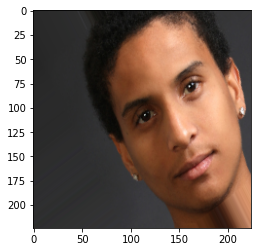

[0. 1.]


In [10]:
# Show an image in the generator on the screen and the classification value 

x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()
    print(y[i])



In [11]:
# Create the validation data generator

valiation_generator = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=16,class_mode='categorical',subset='validation')

Found 88 images belonging to 2 classes.


In [12]:
# Create a convolutional base using MobileNetV2
from keras.applications import MobileNetV2

conv_base = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

In [13]:
# Create the additional model layers 

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='categorical_crossentropy',metrics=['acc'])


In [14]:
# Freeze the bottom layers of the convolutional model. Allow the top layer weights to adjust based on model training

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
      set_trainable = True
      if set_trainable:
          layer.trainable = True
      else:
          layer.trainable = False

In [15]:
# Perform model training on the dataset

history = model.fit(train_generator, epochs=5, validation_data=valiation_generator)

Epoch 1/5
11/11 [==============================] - 11s 1s/step - loss: 0.8070 - acc: 0.7472 - val_loss: 0.4782 - val_acc: 0.7500
Epoch 2/5
11/11 [==============================] - 11s 1s/step - loss: 0.2273 - acc: 0.9006 - val_loss: 0.1620 - val_acc: 0.9432
Epoch 3/5
11/11 [==============================] - 11s 1s/step - loss: 0.1398 - acc: 0.9489 - val_loss: 0.1923 - val_acc: 0.9205
Epoch 4/5
11/11 [==============================] - 11s 1s/step - loss: 0.1652 - acc: 0.9432 - val_loss: 0.0668 - val_acc: 0.9773
Epoch 5/5
11/11 [==============================] - 11s 1s/step - loss: 0.0549 - acc: 0.9716 - val_loss: 0.0656 - val_acc: 0.9773


In [16]:
# Display the model details

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 18,315,074
Trainable params: 18,280,962
Non-trainable params: 34,112
_________________________________________________________________


In [17]:
# Save the model back to Google Drive
model.save('/content/drive/My Drive/msds/462/mask-classifier/')
os.chdir('/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/msds/462/mask-classifier/assets


In [18]:
img_1 = load_img('content/drive/My Drive/msds/462/Test/Test/face_mask_test1.jpg', target_size=(224, 224))

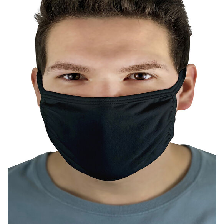

In [19]:
img_1

In [20]:
img_tensor_1 = img_to_array(img_1)

In [21]:
img_tensor_1 = np.expand_dims(img_tensor_1, axis=0)

In [22]:
model.predict(img_tensor_1)

array([[0.93347937, 0.06652066]], dtype=float32)

In [23]:
img_2 = load_img('/content/drive/My Drive/msds/462/Test/Test/no_face_mask_test1.jpg', target_size=(224, 224))

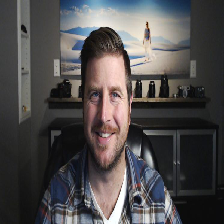

In [24]:
img_2

In [25]:
img_tensor_2 = img_to_array(img_2)
img_tensor_2 = np.expand_dims(img_tensor_2, axis=0)

In [26]:
model.predict(img_tensor_2)

array([[0.832042  , 0.16795799]], dtype=float32)